# <span style = "color:IndianRed; font-size:40px"> Brain Tumor Classification (MRI)</span>

### <button><a href = 'https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/download?datasetVersionNumber=1' style = 'text-decoration:none'>Dataset</a></button>

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
from sklearn.utils import shuffle
from skimage.transform import resize
import glob

### Fetch the training Data

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [3]:
glioma = glob.glob('Brain_tumor/Training/glioma_tumor/*.jpg')
meningoima = glob.glob('Brain_tumor/Training/meningioma_tumor/*.jpg')
no_tumor = glob.glob('Brain_tumor/Training/no_tumor/*.jpg')
pitutary = glob.glob('Brain_tumor/Training/pituitary_tumor/*.jpg')

### Fetch the testing data

In [4]:
glioma_test = glob.glob('Brain_tumor/Testing/glioma_tumor/*.jpg')
meningoima_test = glob.glob('Brain_tumor/Testing/meningioma_tumor/*.jpg')
no_tumor_test = glob.glob('Brain_tumor/Testing/no_tumor/*.jpg')
pitutary_test = glob.glob('Brain_tumor/Testing/pituitary_tumor/*.jpg')

### Find the number of images of all classes in the Training set

In [5]:
print(f"Number of images in Training set are:\nGlioma:{len(glioma)}\nMeningoima:{len(meningoima)}\nNo tumor:{len(no_tumor)}\nPituitary:{len(pitutary)}")

Number of images in Training set are:
Glioma:84
Meningoima:72
No tumor:72
Pituitary:84


### Find the number of images of all classes in the testing set

In [6]:
print(f"Number of images in Testing set are:\nGlioma:{len(glioma_test)}\nMeningoima:{len(meningoima_test)}\nNo tumor:{len(no_tumor_test)}\nPituitary:{len(pitutary_test)}")

Number of images in Testing set are:
Glioma:24
Meningoima:24
No tumor:24
Pituitary:24


### Store all the images inside a list and create a list with the corresponding labels

### For Training set

In [7]:
images = []
label = []

for i in glioma:
    img = plt.imread(i)
    images.append(img)
    label.append(0)
    
for i in meningoima:
    img = plt.imread(i)
    images.append(img)
    label.append(1)

for i in no_tumor:
    img = plt.imread(i)
    images.append(img)
    label.append(2)
    
for i in pitutary:
    img = plt.imread(i)
    images.append(img)
    label.append(3)

### For Testing set

In [8]:
images_test = []
label_test = []

for i in glioma:
    img = plt.imread(i)
    images_test.append(img)
    label_test.append(0)
    
for i in meningoima:
    img = plt.imread(i)
    images_test.append(img)
    label_test.append(1)

for i in no_tumor:
    img = plt.imread(i)
    images_test.append(img)
    label_test.append(2)
    
for i in pitutary:
    img = plt.imread(i)
    images_test.append(img)
    label_test.append(3)

In [9]:
d = {0:'Glioma', 1:'Meningoima', 2:'No Tumor', 3:'Pituitary'}

### Shuffle both image list and label list (In both Training and testing set)

#### Use shuffle function from sklearn utils

In [10]:
images, label = shuffle(images, label, random_state=100)

In [11]:
images_test, label_test = shuffle(images_test, label_test, random_state=100)

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

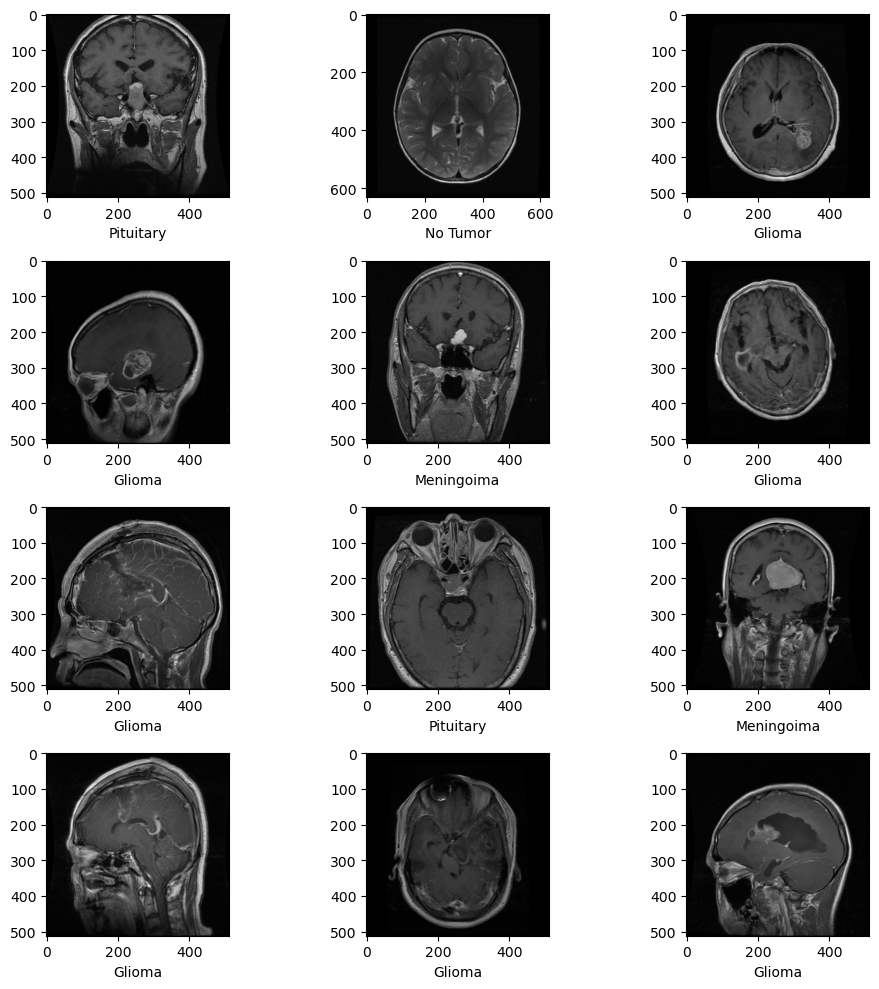

In [12]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.xlabel(d[label[i]])
plt.tight_layout()

### Check the shape of the first 10 images in our list (Either from training or test set)

In [13]:
for i in range(10):
    print(images[i].shape)

(512, 512, 3)
(630, 630, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


### Reshape the images to 224x224( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [14]:
X_train = []

for i in images:
    X_train.append(resize(i, (224,224,3)))

X_train = np.array(X_train)

In [15]:
X_test = []

for i in images_test:
    X_test.append(resize(i, (224,224,3)))

X_test = np.array(X_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [16]:
y_train = np.array(label)
y_test = np.array(label_test)

### Plot some of our reshaped images

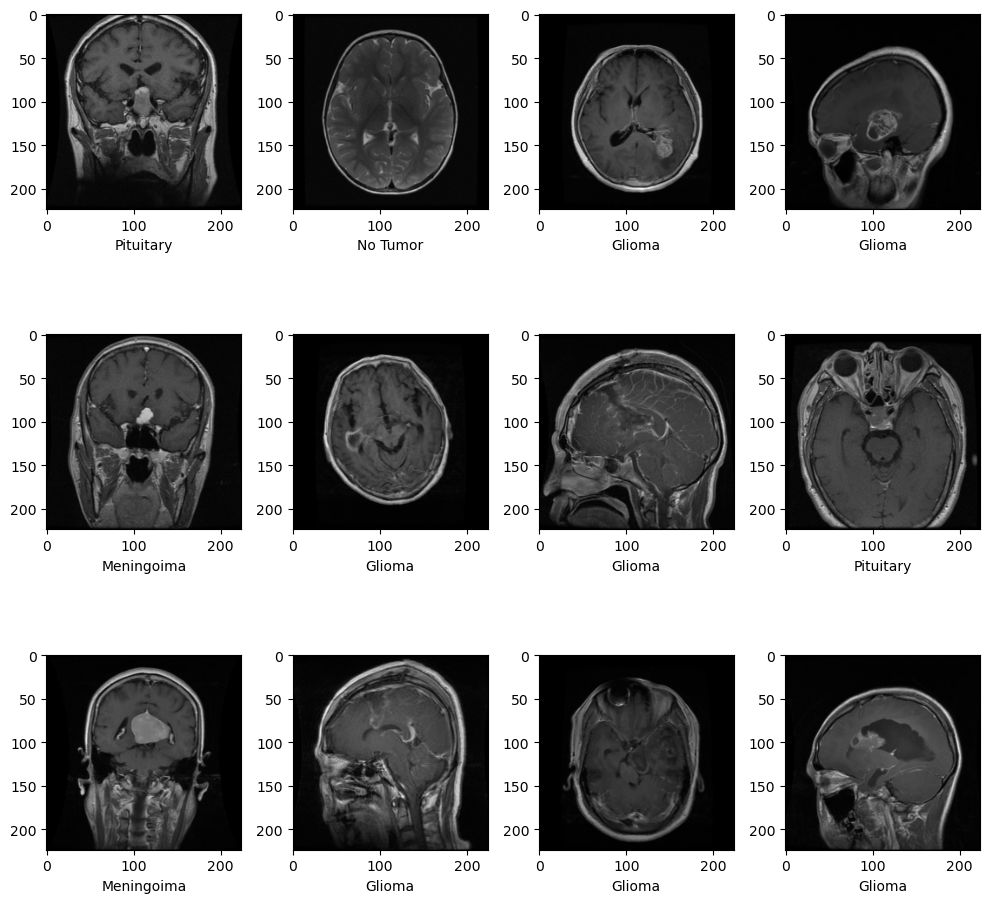

In [17]:
plt.figure(figsize = (10,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i])
    plt.xlabel(d[y_train[i]])
    
plt.tight_layout()

### Check the shape of X_train and X_test and y_train and y_test

In [18]:
print(f"Shape of X_train is: {X_train.shape}\nShape of X_test is: {X_test.shape}\nShape of y_train is: {y_train.shape}\nShape of y_test is: {y_test.shape}")

Shape of X_train is: (312, 224, 224, 3)
Shape of X_test is: (312, 224, 224, 3)
Shape of y_train is: (312,)
Shape of y_test is: (312,)


### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [19]:
model = Sequential([
    layers.Conv2D(18, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(36, (3,3), activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'sigmoid')
])

### Compile the model

#### Use 'sparse_categorical_crossentropy' for loss

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Check the summary of our model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 18)      504       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 18)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 36)      5868      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 36)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 104976)            0         
                                                                 
 dense (Dense)               (None, 64)                6

### Train the model. 
Make sure to include a validation data with validation_split

In [22]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
10/10 [==============================] - 5s 423ms/step - loss: 1.9288 - accuracy: 0.3851 - val_loss: 1.3087 - val_accuracy: 0.1875
Epoch 2/10
10/10 [==============================] - 4s 372ms/step - loss: 0.8657 - accuracy: 0.6486 - val_loss: 0.7747 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 4s 392ms/step - loss: 0.3348 - accuracy: 0.9020 - val_loss: 0.2943 - val_accuracy: 0.8125
Epoch 4/10
10/10 [==============================] - 4s 361ms/step - loss: 0.1403 - accuracy: 0.9730 - val_loss: 0.3367 - val_accuracy: 0.8750
Epoch 5/10
10/10 [==============================] - 4s 357ms/step - loss: 0.0950 - accuracy: 0.9662 - val_loss: 0.0545 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 4s 368ms/step - loss: 0.0282 - accuracy: 0.9966 - val_loss: 0.2172 - val_accuracy: 0.8750
Epoch 7/10
10/10 [==============================] - 4s 382ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 

### Evaluate the model

In [23]:
model.evaluate(X_train, y_train)

10/10 [==============================] - 1s 79ms/step - loss: 0.0066 - accuracy: 0.9968


[0.006583771668374538, 0.9967948794364929]

### Make predictions with X_test

In [24]:
pred = model.predict(X_test)

10/10 [==============================] - 1s 77ms/step


In [25]:
pred

array([[0.28263724, 0.20423947, 0.6339847 , 0.9999926 ],
       [0.30269513, 0.00640077, 0.99993795, 0.88681626],
       [0.99962264, 0.4911723 , 0.9576305 , 0.00603662],
       ...,
       [0.9999845 , 0.41849834, 0.43307623, 0.4932068 ],
       [0.04695784, 0.85577035, 0.2803014 , 0.9999313 ],
       [0.9998711 , 0.56928796, 0.9612754 , 0.00132688]], dtype=float32)

### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [26]:
y_pred = [np.argmax(i) for i in pred]

In [27]:
y_pred[:5]

[3, 2, 0, 0, 1]

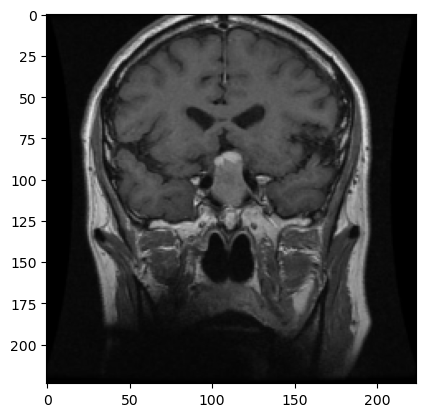

In [28]:
plt.imshow(X_test[0])

### Plot X_test with label from our prediction

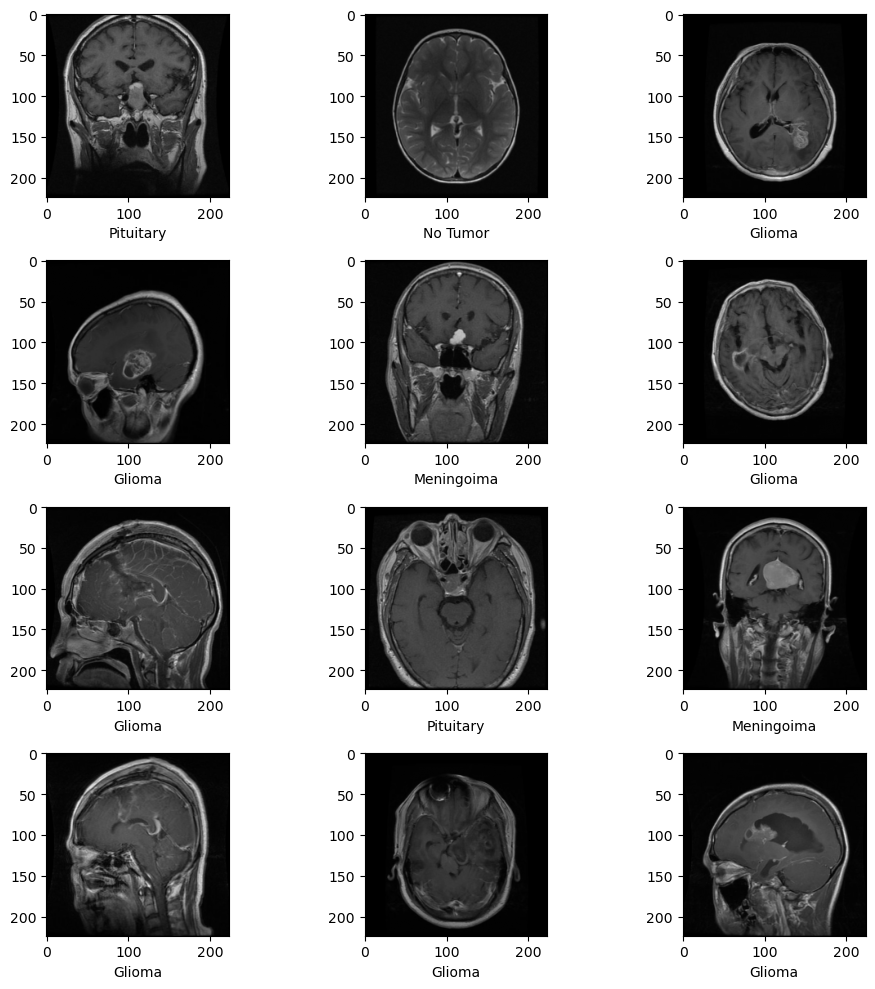

In [29]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(d[y_pred[i]])
plt.tight_layout()

### Visualise confusion matrix on a heatmap

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.9967948717948718

<Axes: >

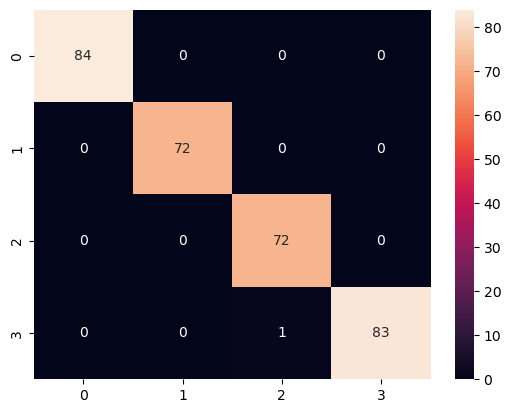

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)